Group 2

In [3]:
#620150541, 620147754, 620148643, 620146106, 620151974
#Data Acquisition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Data Acquisition

In [4]:
df = pd.read_csv('lung cancer.csv', encoding="latin1")
df.head(10)
#2 means YES and 1 means NO

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [5]:
#There are no missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


## Data Preprocessing

In [6]:
#Data Transformation - Changing the categorical data into numeric
label_encoder = LabelEncoder()
df['GENDER_ENCODED'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER_ENCODED'] = label_encoder.fit_transform(df['LUNG_CANCER'])
df.drop(['GENDER', 'LUNG_CANCER'], axis=1, inplace=True)
df.head(10)

#1 is M and YES

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_ENCODED,LUNG_CANCER_ENCODED
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
5,75,1,2,1,1,2,2,2,2,1,2,2,1,1,0,1
6,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1,1
7,51,2,2,2,2,1,2,2,1,1,1,2,2,1,0,1
8,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0,0
9,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1,1


In [7]:
#Removing Outliers
z_scores = np.abs((df - df.mean()) / df.std())
outliers = df[(z_scores > 3).any(axis=1)]
print("Outliers:\n", outliers)

df = df[(z_scores < 3).all(axis=1)]
df.head(10)

Outliers:
      AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
22    21        2               1        1              1                2   
238   38        1               2        1              1                2   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
22          2         2         1                  1         1   
238         2         2         2                  1         2   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  GENDER_ENCODED  \
22                     2                      1           1               0   
238                    2                      1           2               0   

     LUNG_CANCER_ENCODED  
22                     0  
238                    1  


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_ENCODED,LUNG_CANCER_ENCODED
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
5,75,1,2,1,1,2,2,2,2,1,2,2,1,1,0,1
6,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1,1
7,51,2,2,2,2,1,2,2,1,1,1,2,2,1,0,1
8,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0,0
9,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1,1


In [8]:
# Remove trailing spaces from column names
df.columns = df.columns.str.strip()

In [9]:
#Exploratory Data Analysis (EDA)
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_ENCODED,LUNG_CANCER_ENCODED
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,62.889251,1.563518,1.570033,1.501629,1.504886,1.501629,1.671010,1.553746,1.557003,1.560261,1.579805,1.638436,1.472313,1.557003,0.527687,0.876221
std,7.754871,0.496759,0.495879,0.500814,0.500792,0.500814,0.470614,0.497915,0.497551,0.497166,0.494396,0.481238,0.500048,0.497551,0.500048,0.329866
min,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,62.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000


## Exploratory Data Analysis

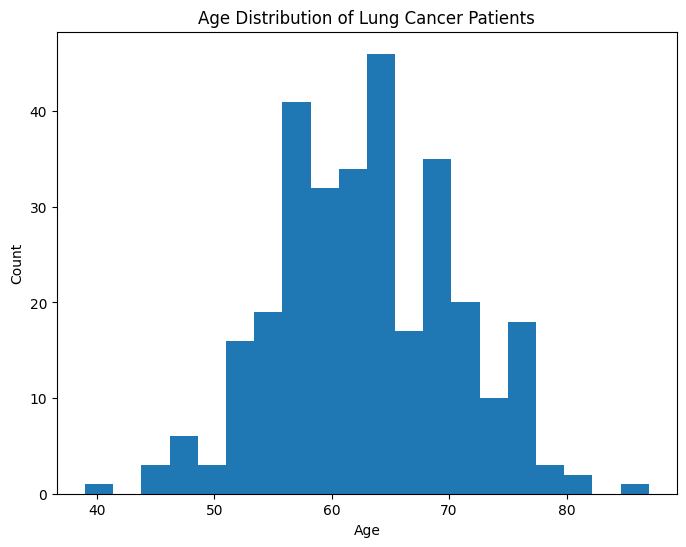

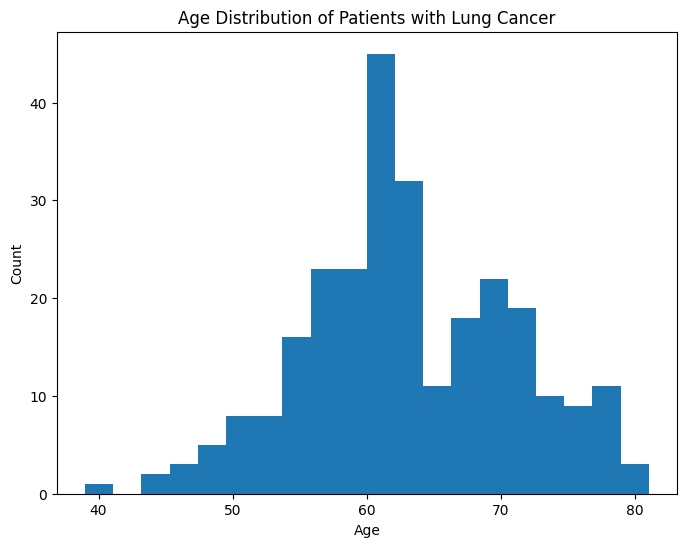

In [10]:
#AGE
plt.figure(figsize=(8,6))
plt.hist(df['AGE'], bins=20)
plt.title('Age Distribution of Lung Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

lung_cancer_age_counts = df[df['LUNG_CANCER_ENCODED'] == 1]['AGE']
plt.figure(figsize=(8,6))
plt.hist(lung_cancer_age_counts, bins=20)
plt.title('Age Distribution of Patients with Lung Cancer')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

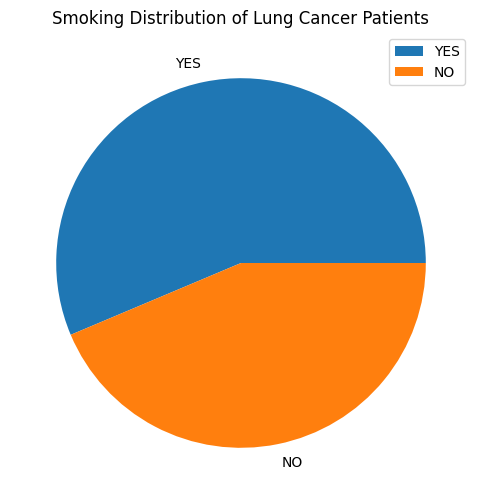

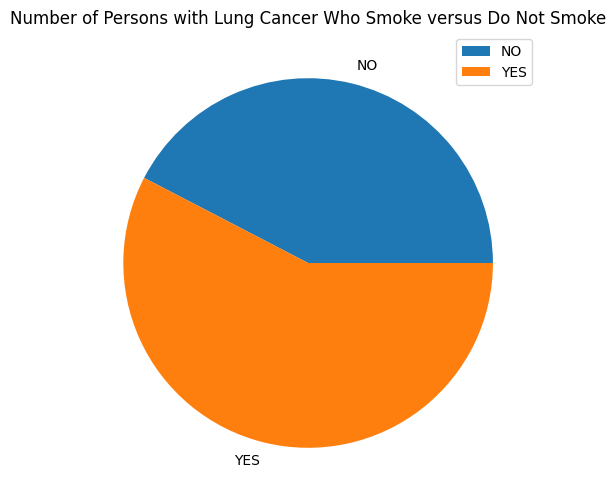

In [11]:
#SMOKING
smoking_totals = df['SMOKING'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(smoking_totals, labels=mylabels)
plt.title('Smoking Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_smoking_counts = df.groupby('SMOKING')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_smoking_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Smoke versus Do Not Smoke')
plt.legend()
plt.show()

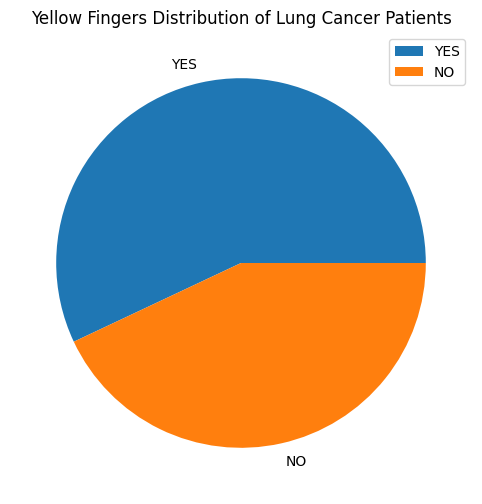

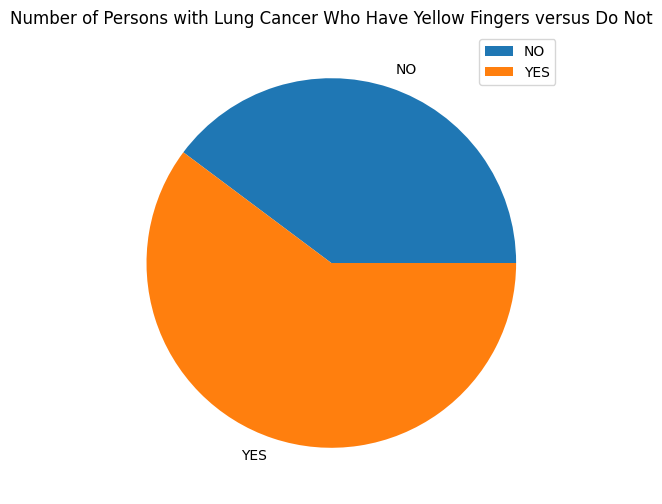

In [12]:
#Yellow Fingers
yf_totals = df['YELLOW_FINGERS'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(yf_totals, labels=mylabels)
plt.title('Yellow Fingers Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_yf_counts = df.groupby('YELLOW_FINGERS')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_yf_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Yellow Fingers versus Do Not')
plt.legend()
plt.show()

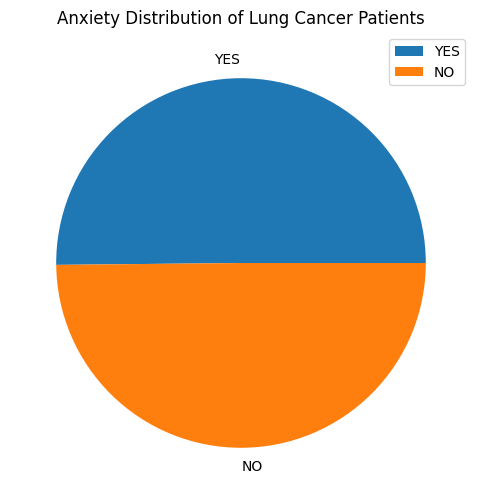

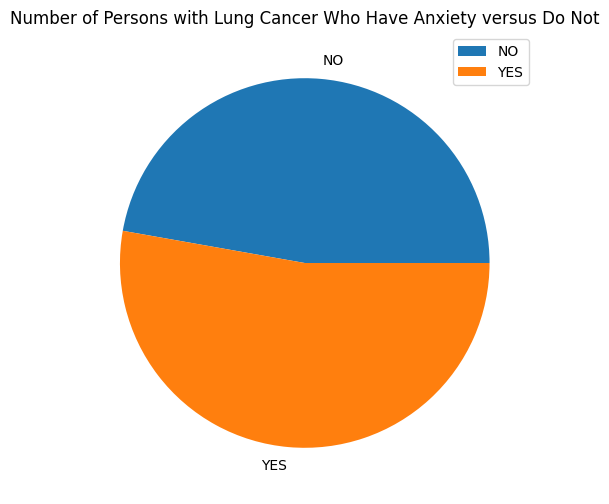

In [13]:
#ANXIETY
anxiety_totals = df['ANXIETY'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(anxiety_totals, labels=mylabels)
plt.title('Anxiety Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_anxiety_counts = df.groupby('ANXIETY')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_anxiety_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Anxiety versus Do Not')
plt.legend()
plt.show()

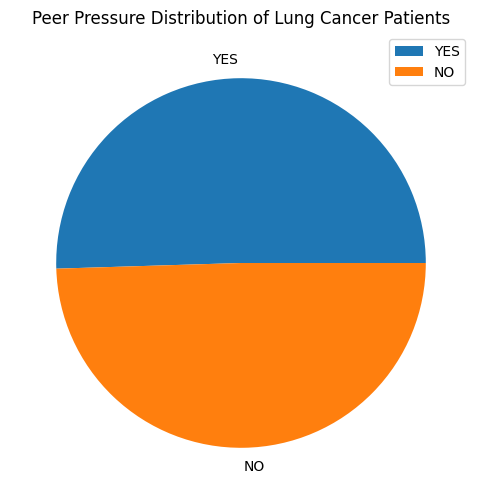

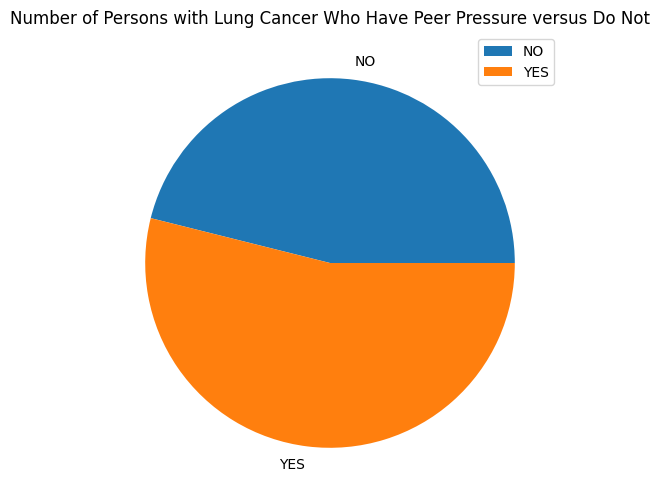

In [14]:
#PEER_PRESSURE
pp_totals = df['PEER_PRESSURE'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(pp_totals, labels=mylabels)
plt.title('Peer Pressure Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_pp_counts = df.groupby('PEER_PRESSURE')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_pp_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Peer Pressure versus Do Not')
plt.legend()
plt.show()

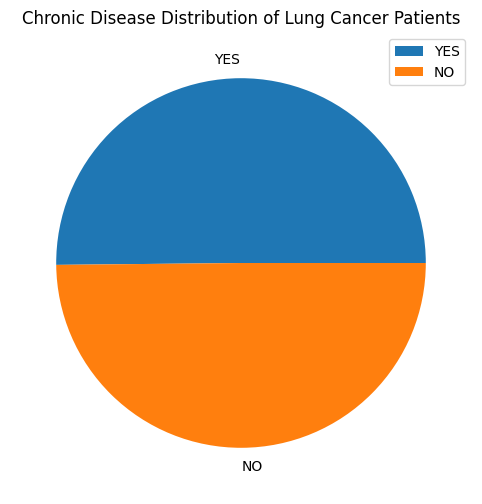

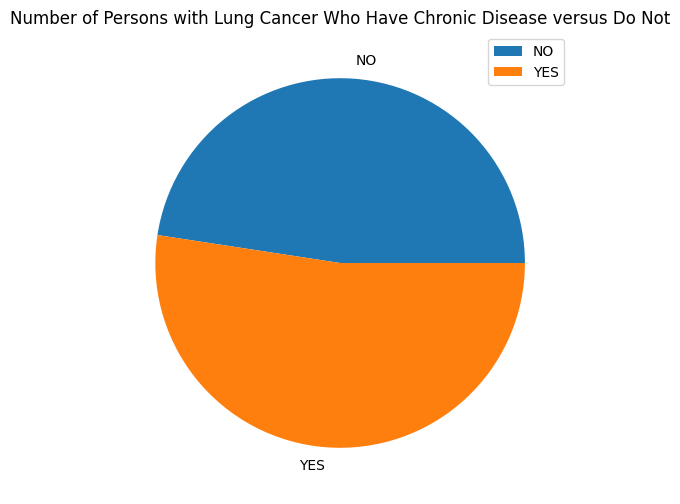

In [15]:
#CHRONIC DISEASE
cd_totals = df['CHRONIC DISEASE'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(cd_totals, labels=mylabels)
plt.title('Chronic Disease Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_cd_counts = df.groupby('CHRONIC DISEASE')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_cd_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Chronic Disease versus Do Not')
plt.legend()
plt.show()

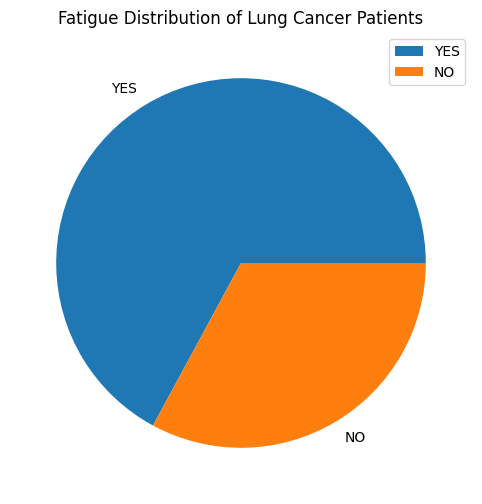

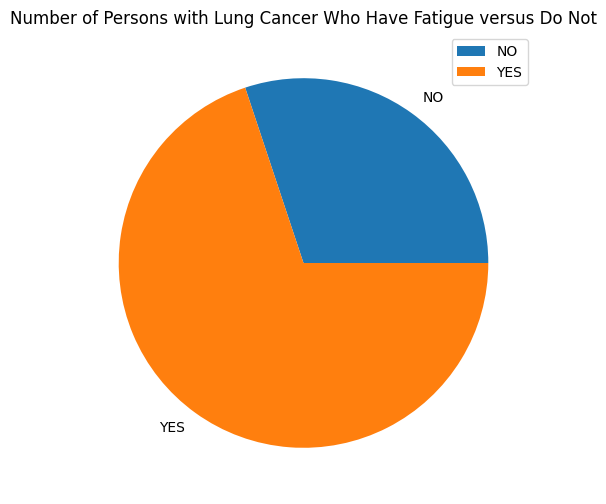

In [16]:
#FATIGUE
fatigue_totals = df['FATIGUE'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(fatigue_totals, labels=mylabels)
plt.title('Fatigue Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_fatigue_counts = df.groupby('FATIGUE')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_fatigue_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Fatigue versus Do Not')
plt.legend()
plt.show()

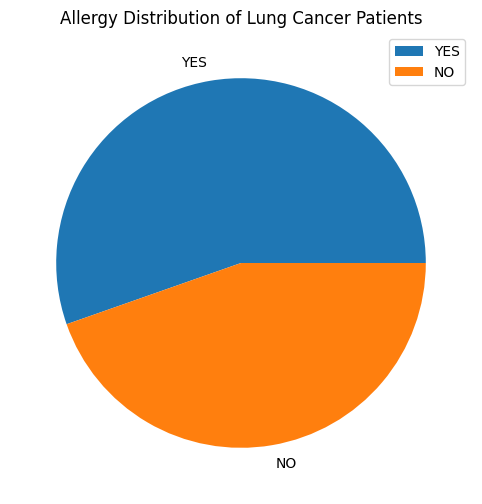

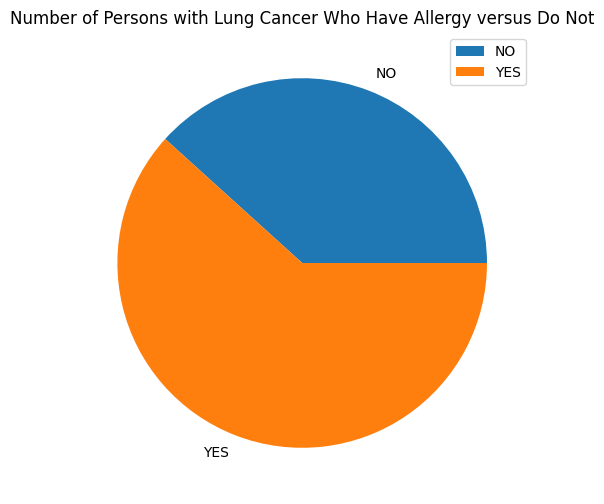

In [17]:
#ALLERGY
allergy_totals = df['ALLERGY'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(allergy_totals, labels=mylabels)
plt.title('Allergy Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_allergy_counts = df.groupby('ALLERGY')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_allergy_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Allergy versus Do Not')
plt.legend()
plt.show()

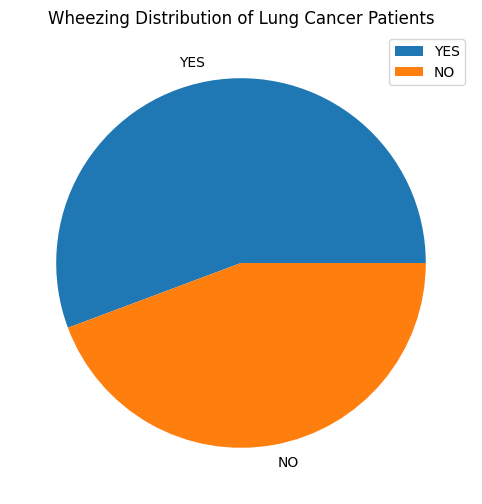

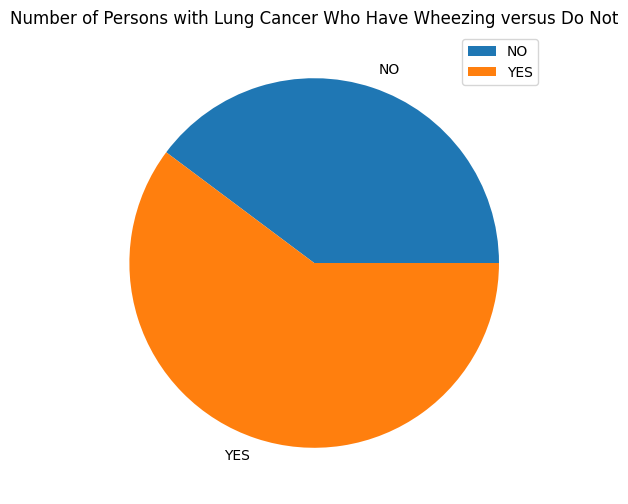

In [18]:
#WHEEZING
wheezing_totals = df['WHEEZING'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(wheezing_totals, labels=mylabels)
plt.title('Wheezing Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_wheezing_counts = df.groupby('WHEEZING')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_wheezing_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Wheezing versus Do Not')
plt.legend()
plt.show()

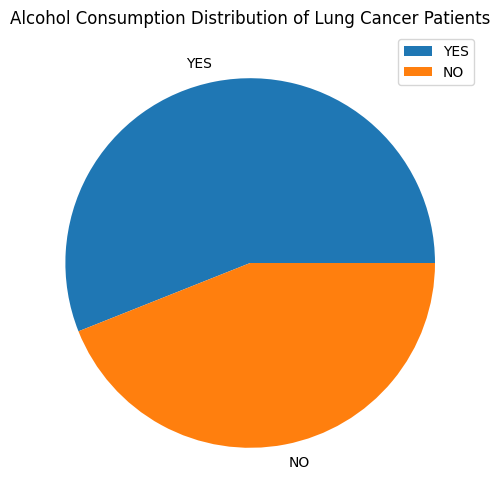

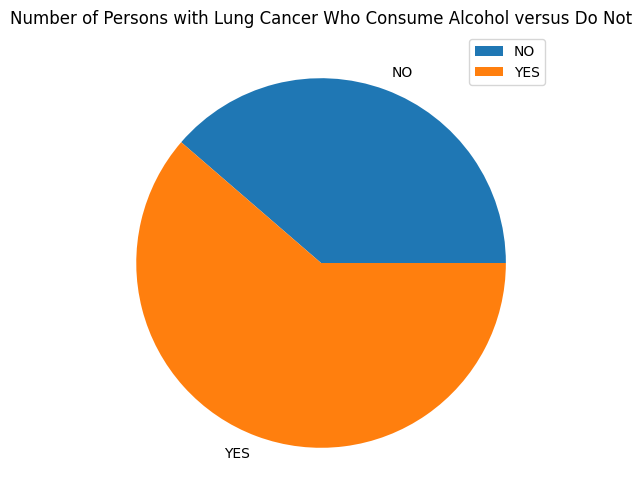

In [19]:
#ALCOHOL CONSUMING
ac_totals = df['ALCOHOL CONSUMING'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(ac_totals, labels=mylabels)
plt.title('Alcohol Consumption Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_ac_counts = df.groupby('ALCOHOL CONSUMING')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_ac_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Consume Alcohol versus Do Not')
plt.legend()
plt.show()

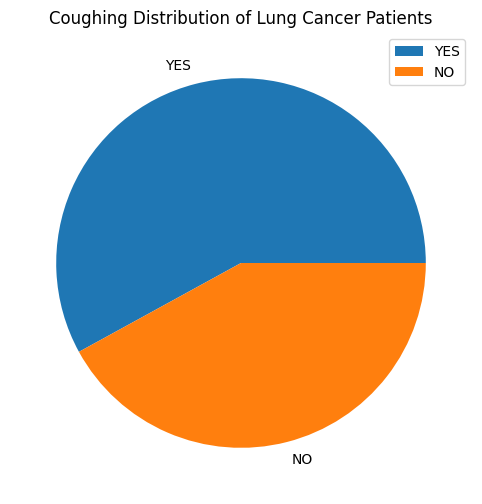

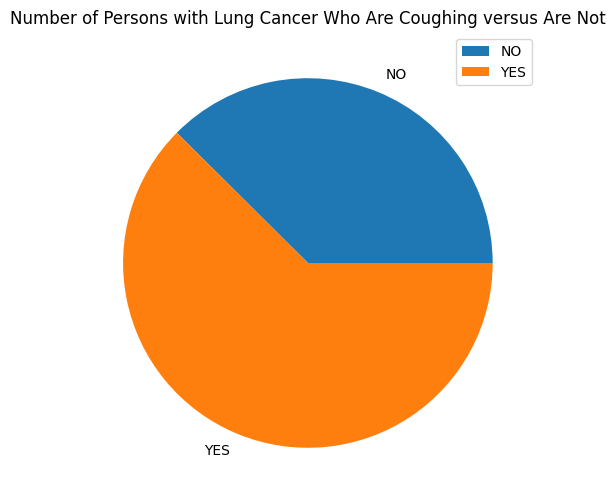

In [20]:
#COUGHING
coughing_totals = df['COUGHING'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(coughing_totals, labels=mylabels)
plt.title('Coughing Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_coughing_counts = df.groupby('COUGHING')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_coughing_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Are Coughing versus Are Not')
plt.legend()
plt.show()

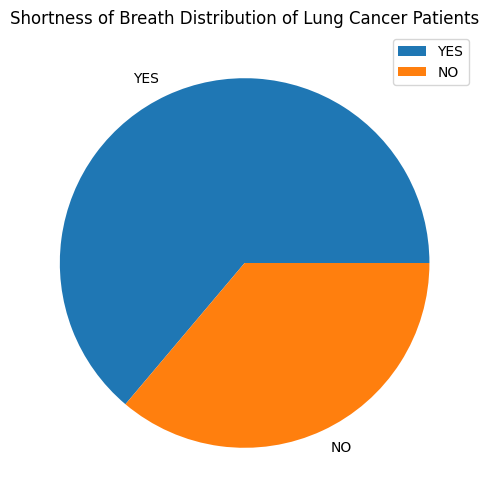

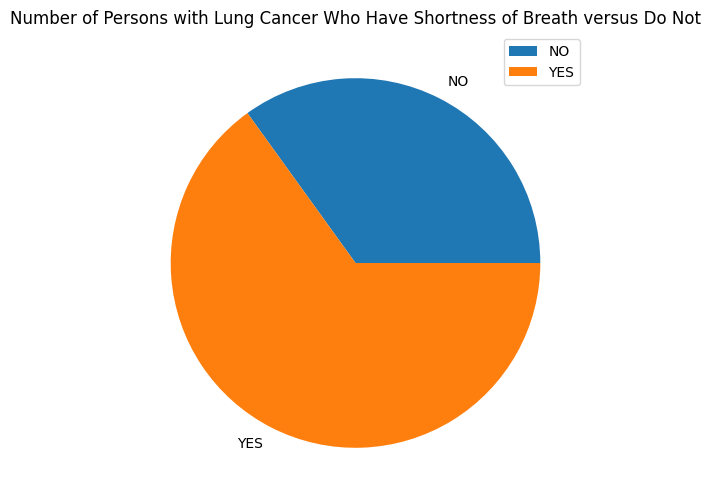

In [21]:
#SHORTNESS OF BREATH
sob_totals = df['SHORTNESS OF BREATH'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(sob_totals, labels=mylabels)
plt.title('Shortness of Breath Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_sob_counts = df.groupby('SHORTNESS OF BREATH')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_sob_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Shortness of Breath versus Do Not')
plt.legend()
plt.show()

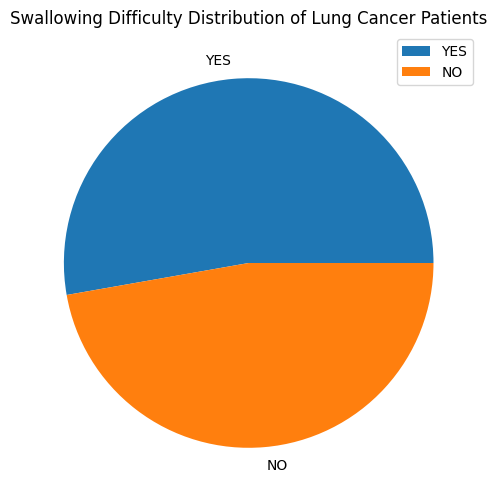

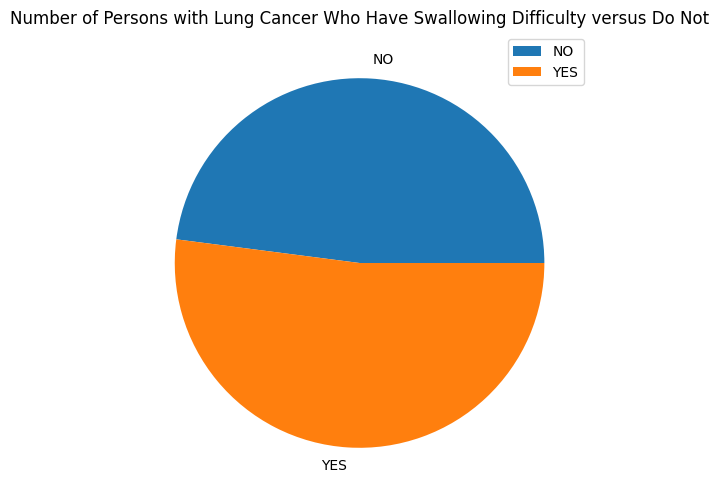

In [22]:
#SWALLOWING DIFFICULTY
sd_totals = df['SWALLOWING DIFFICULTY'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(sd_totals, labels=mylabels)
plt.title('Swallowing Difficulty Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_sd_counts = df.groupby('SWALLOWING DIFFICULTY')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_sd_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Swallowing Difficulty versus Do Not')
plt.legend()
plt.show()

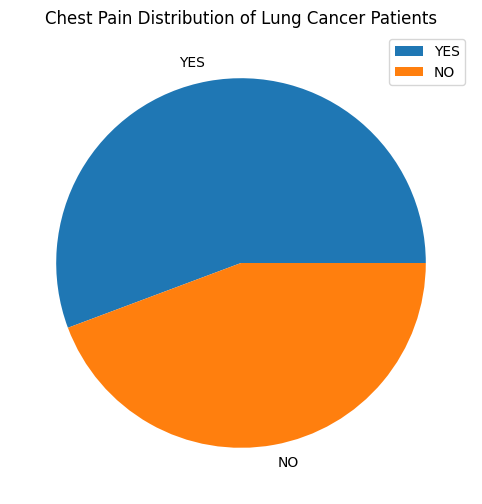

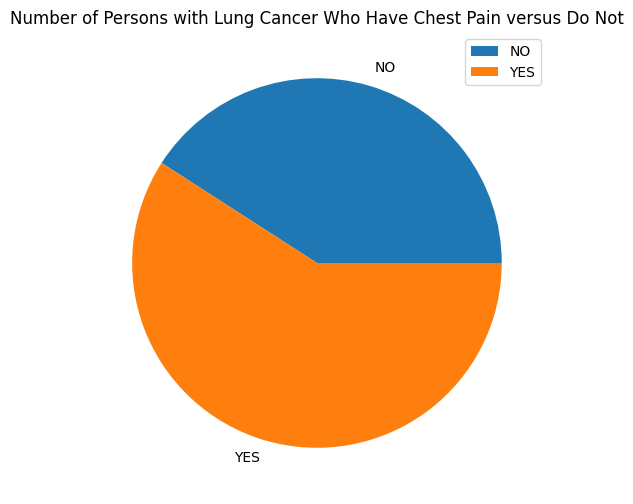

In [23]:
#CHEST PAIN
cp_totals = df['CHEST PAIN'].value_counts()
mylabels = ["YES", "NO"]
plt.figure(figsize=(8,6))
plt.pie(cp_totals, labels=mylabels)
plt.title('Chest Pain Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_cp_counts = df.groupby('CHEST PAIN')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["NO", "YES"]
plt.pie(lung_cancer_cp_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who Have Chest Pain versus Do Not')
plt.legend()
plt.show()

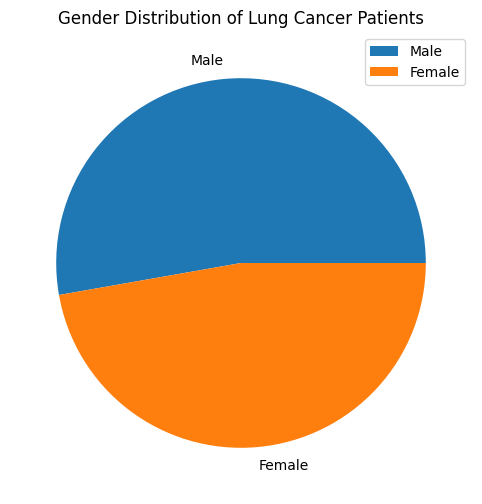

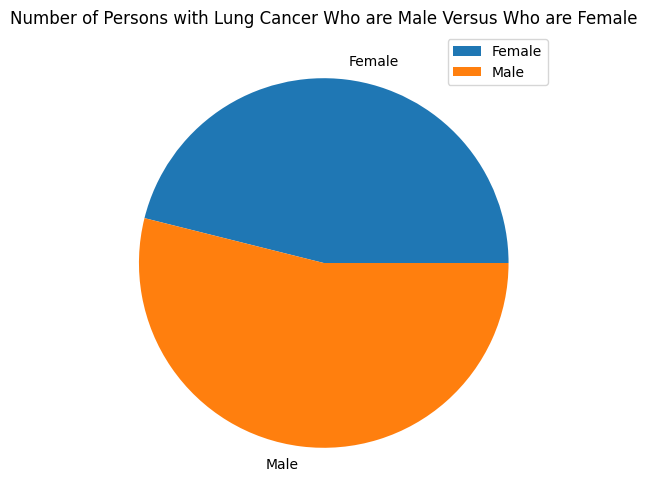

In [24]:
#GENDER_ENCODED
gender_totals = df['GENDER_ENCODED'].value_counts()
mylabels = ["Male", "Female"]
plt.figure(figsize=(8,6))
plt.pie(gender_totals, labels=mylabels)
plt.title('Gender Distribution of Lung Cancer Patients')
plt.legend()
plt.show()


lung_cancer_gender_counts = df.groupby('GENDER_ENCODED')['LUNG_CANCER_ENCODED'].sum()
plt.figure(figsize=(6, 6))
mylabels = ["Female", "Male"]
plt.pie(lung_cancer_gender_counts, labels=mylabels)
plt.title('Number of Persons with Lung Cancer Who are Male Versus Who are Female')
plt.legend()
plt.show()

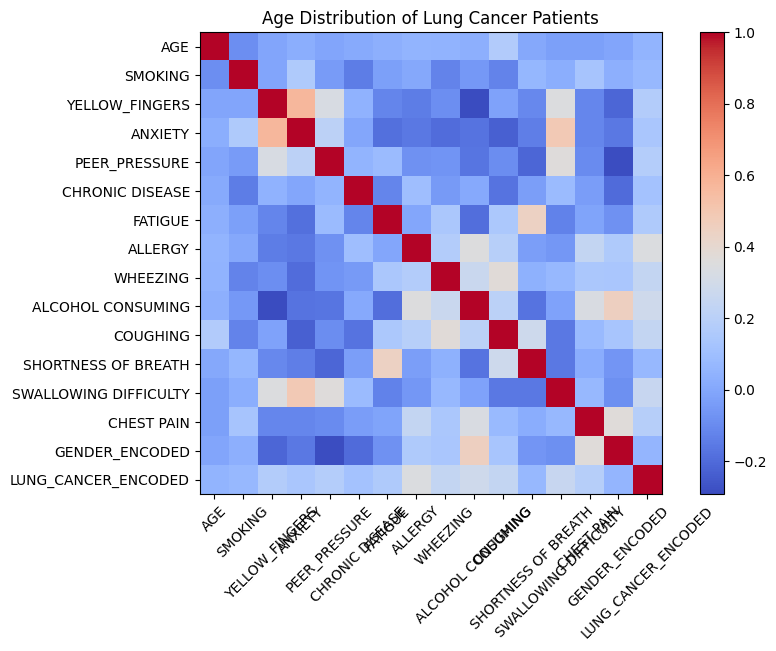

In [25]:
#Heatmap
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Age Distribution of Lung Cancer Patients')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

## Feature Selection and Engineering

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    307 non-null    int64
 1   SMOKING                307 non-null    int64
 2   YELLOW_FINGERS         307 non-null    int64
 3   ANXIETY                307 non-null    int64
 4   PEER_PRESSURE          307 non-null    int64
 5   CHRONIC DISEASE        307 non-null    int64
 6   FATIGUE                307 non-null    int64
 7   ALLERGY                307 non-null    int64
 8   WHEEZING               307 non-null    int64
 9   ALCOHOL CONSUMING      307 non-null    int64
 10  COUGHING               307 non-null    int64
 11  SHORTNESS OF BREATH    307 non-null    int64
 12  SWALLOWING DIFFICULTY  307 non-null    int64
 13  CHEST PAIN             307 non-null    int64
 14  GENDER_ENCODED         307 non-null    int64
 15  LUNG_CANCER_ENCODED    307 non-null    int64


##Creating new features

In [27]:
# Social Behavior Metrics
social_behaviors = ['PEER_PRESSURE', 'ALCOHOL CONSUMING', 'ANXIETY']
df['SOCIAL_BEHAVIOR_SCORE'] = df[social_behaviors].sum(axis=1)

In [28]:
# Respiratory Health Metrics
respiratory_factors = ['ALLERGY', 'WHEEZING', 'COUGHING','SHORTNESS OF BREATH', 'CHEST PAIN', 'SWALLOWING DIFFICULTY']
df['RESPIRATORY_HEALTH_SCORE'] = df[respiratory_factors].sum(axis=1)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax_scaler = MinMaxScaler()
#Normalizing age
df['AGE_NORMALIZED'] = minmax_scaler.fit_transform(df[['AGE']])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 308
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       307 non-null    int64  
 1   SMOKING                   307 non-null    int64  
 2   YELLOW_FINGERS            307 non-null    int64  
 3   ANXIETY                   307 non-null    int64  
 4   PEER_PRESSURE             307 non-null    int64  
 5   CHRONIC DISEASE           307 non-null    int64  
 6   FATIGUE                   307 non-null    int64  
 7   ALLERGY                   307 non-null    int64  
 8   WHEEZING                  307 non-null    int64  
 9   ALCOHOL CONSUMING         307 non-null    int64  
 10  COUGHING                  307 non-null    int64  
 11  SHORTNESS OF BREATH       307 non-null    int64  
 12  SWALLOWING DIFFICULTY     307 non-null    int64  
 13  CHEST PAIN                307 non-null    int64  
 14  GENDER_ENCODED 

##Hypothesis Testing

In [31]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [32]:
# Significance level
alpha = 0.01

In [33]:
lung_cancer_yes = df[df['LUNG_CANCER_ENCODED'] == 1]
lung_cancer_no = df[df['LUNG_CANCER_ENCODED'] == 0]

t_statistic, p_val = ttest_ind(lung_cancer_yes['AGE_NORMALIZED'], lung_cancer_no['AGE_NORMALIZED'])

print("Two-sample t-test results for 'Age' between individuals with and without lung cancer:")
print("T-statistic:", t_statistic)
print("P-value:", p_val)

if p_val < alpha:
    print("Age is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between age and lung cancer.")

Two-sample t-test results for 'Age' between individuals with and without lung cancer:
T-statistic: 0.9337358070462616
P-value: 0.3511788016726478
There is no significant association between age and lung cancer.


In [34]:
lung_cancer_yes = df[df['LUNG_CANCER_ENCODED'] == 1]
lung_cancer_no = df[df['LUNG_CANCER_ENCODED'] == 0]
t_statistic, p_val = ttest_ind(lung_cancer_yes['SOCIAL_BEHAVIOR_SCORE'], lung_cancer_no['SOCIAL_BEHAVIOR_SCORE'])

print("Two-sample t-test results for 'Social Behaviour Score' between individuals with and without lung cancer:")
print("T-statistic:", t_statistic)
print("P-value:", p_val)

if p_val < alpha:
    print("Social behaviour score is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between social behaviour score and lung cancer.")

Two-sample t-test results for 'Social Behaviour Score' between individuals with and without lung cancer:
T-statistic: 6.862724390434516
P-value: 3.7780481870627806e-11
Social behaviour score is a significant factor associated with lung cancer.


In [35]:
lung_cancer_yes = df[df['LUNG_CANCER_ENCODED'] == 1]
lung_cancer_no = df[df['LUNG_CANCER_ENCODED'] == 0]

t_statistic, p_val = ttest_ind(lung_cancer_yes['RESPIRATORY_HEALTH_SCORE'], lung_cancer_no['RESPIRATORY_HEALTH_SCORE'])

print("Two-sample t-test results for 'Respiratory Health Score' between individuals with and without lung cancer:")
print("T-statistic:", t_statistic)
print("P-value:", p_val)

if p_val < alpha:
    print("Respiratory health is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between respiratory health score and lung cancer.")

Two-sample t-test results for 'Respiratory Health Score' between individuals with and without lung cancer:
T-statistic: 8.951398148031423
P-value: 3.516793724852173e-17
Respiratory health is a significant factor associated with lung cancer.


In [36]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['SMOKING'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Smoking is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between smoking and lung cancer.")

Chi-square statistic: 1.03660258417898
P-value: 0.3086129394536048
Degrees of freedom: 1
There is no significant association between smoking and lung cancer.


In [37]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['YELLOW_FINGERS'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Yellow fingers is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between yellow fingers and lung cancer.")

Chi-square statistic: 8.16167567766154
P-value: 0.004278482282687588
Degrees of freedom: 1
Yellow fingers is a significant factor associated with lung cancer.


In [38]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['ANXIETY'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Anxiety is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between anxiety and lung cancer.")

Chi-square statistic: 5.172790511679675
P-value: 0.02294333209891496
Degrees of freedom: 1
There is no significant association between anxiety and lung cancer.


In [39]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['PEER_PRESSURE'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Peer pressure is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between peer presure and lung cancer.")

Chi-square statistic: 9.06380156265208
P-value: 0.0026071935790816752
Degrees of freedom: 1
Peer pressure is a significant factor associated with lung cancer.


In [40]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['CHRONIC DISEASE'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Chronic disease is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between chronic disease and lung cancer.")

Chi-square statistic: 3.7163086132041516
P-value: 0.05388337155409585
Degrees of freedom: 1
There is no significant association between chronic disease and lung cancer.


In [41]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['FATIGUE'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Fatigue is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between fatigue and lung cancer.")

Chi-square statistic: 6.663227182041708
P-value: 0.009842251628578925
Degrees of freedom: 1
Fatigue is a significant factor associated with lung cancer.


In [42]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['ALLERGY'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Allergy is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between allergy and lung cancer.")

Chi-square statistic: 33.25859693570448
P-value: 8.068227504465708e-09
Degrees of freedom: 1
Allergy is a significant factor associated with lung cancer.


In [43]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['WHEEZING'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Wheezing is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between wheezing and lung cancer.")

Chi-square statistic: 16.565226981436936
P-value: 4.700503225643931e-05
Degrees of freedom: 1
Wheezing is a significant factor associated with lung cancer.


In [44]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['ALCOHOL CONSUMING'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Alcohol consumption is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between alcohol consumption and lung cancer.")

Chi-square statistic: 23.181386698286833
P-value: 1.4741731209755625e-06
Degrees of freedom: 1
Alcohol consumption is a significant factor associated with lung cancer.


In [45]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['COUGHING'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Coughing is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between coughing and lung cancer.")

Chi-square statistic: 16.39539875571476
P-value: 5.140987577874612e-05
Degrees of freedom: 1
Coughing is a significant factor associated with lung cancer.


In [46]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['SHORTNESS OF BREATH'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Shortness of breath is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between shortness of breath and lung cancer.")

Chi-square statistic: 0.9915231589814771
P-value: 0.3193703858813325
Degrees of freedom: 1
There is no significant association between shortness of breath and lung cancer.


In [47]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['SWALLOWING DIFFICULTY'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Difficulty swallowing is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between difficulty swallowing and lung cancer.")

Chi-square statistic: 18.671843985405644
P-value: 1.5525827403348037e-05
Degrees of freedom: 1
Difficulty swallowing is a significant factor associated with lung cancer.


In [48]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['CHEST PAIN'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Chest pain is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between chest pain and lung cancer.")

Chi-square statistic: 9.141006265439408
P-value: 0.0024994360214342635
Degrees of freedom: 1
Chest pain is a significant factor associated with lung cancer.


In [49]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['GENDER_ENCODED'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Gender is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between gender and lung cancer.")

Chi-square statistic: 0.7848695559265448
P-value: 0.37565598163020864
Degrees of freedom: 1
There is no significant association between gender and lung cancer.


In [50]:
contingency_table = pd.crosstab(df['LUNG_CANCER_ENCODED'], df['AGE'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < alpha:
    print("Age group is a significant factor associated with lung cancer.")
else:
    print("There is no significant association between age group and lung cancer.")

Chi-square statistic: 47.311146317769655
P-value: 0.09830245481552528
Degrees of freedom: 36
There is no significant association between age group and lung cancer.


## Discussion

Significant Factors Associated with Lung Cancer:
* Yellow Fingers (P-value: 0.0043)
* Peer Pressure (P-value: 0.0026)
* Fatigue (P-value: 0.0098)
* Allergy (P-value: 8.07e-09)
* Wheezing (P-value: 4.70e-05)
* Alcohol Consuming (P-value: 1.47e-06)
* Coughing (P-value: 5.14e-05)
* Difficulty Swallowing (P-value: 1.55e-05)
* Chest Pain (P-value: 0.0025)
* Social Behavior Score (P-value: 3.78e-11)
* Respiratory Health Score (P-value: 3.52e-17)

No Significant Association with Lung Cancer:
* Chronic Disease (P-value: 0.0539)
* Shortness of Breath (P-value: 0.319)
* Gender (P-value: 0.376)
* Age (P-value: 0.0983)
* Gender (P-value: 0.376)
* Smoking (P-value: 0.309)

Suggested Factors to use with model:
* Social Behaviour Score
* Respiratory Health Score
* Fatigue
* Age*
* Gender*

*While age and gender were shown to not be significant factors, they proved to improve the model's performance. This was observed while using trial and error to update features.

## Model Selection and Training

In [51]:
x = df[['AGE_NORMALIZED', 'SOCIAL_BEHAVIOR_SCORE',	'FATIGUE', 'RESPIRATORY_HEALTH_SCORE', 'GENDER_ENCODED']].values

In [52]:
print(x.shape)

(307, 5)


In [53]:
x

array([[ 0.625     ,  5.        ,  2.        , 11.        ,  1.        ],
       [ 0.72916667,  3.        ,  2.        , 10.        ,  1.        ],
       [ 0.41666667,  4.        ,  2.        , 10.        ,  0.        ],
       ...,
       [ 0.39583333,  4.        ,  1.        , 10.        ,  1.        ],
       [ 0.58333333,  5.        ,  2.        , 10.        ,  1.        ],
       [ 0.47916667,  5.        ,  2.        ,  9.        ,  1.        ]])

Normalize

In [54]:
import sklearn

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

In [57]:
x = sc.fit_transform(x)

In [58]:
x

array([[ 0.78927503,  0.52458239,  0.70020801,  1.13650806,  0.94607702],
       [ 1.43508376, -1.8971739 ,  0.70020801,  0.44423033,  0.94607702],
       [-0.50234243, -0.68629576,  0.70020801,  0.44423033, -1.0569964 ],
       ...,
       [-0.63150417, -0.68629576, -1.42814704,  0.44423033,  0.94607702],
       [ 0.53095154,  0.52458239,  0.70020801,  0.44423033,  0.94607702],
       [-0.11485719,  0.52458239,  0.70020801, -0.24804739,  0.94607702]])

In [59]:
y= df[['LUNG_CANCER_ENCODED']].values

In [60]:
print(y.shape)

(307, 1)


In [61]:
y

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

Train/Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 7)

In [64]:
x_train.shape, x_test.shape

((276, 5), (31, 5))

In [65]:
from sklearn.linear_model import LogisticRegression

Logistic Regression

In [66]:
log_model = LogisticRegression()

In [67]:
log_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [68]:
log_model.score(x_test, y_test)

0.9354838709677419

Support Vector Machine (SVM)

In [69]:
from sklearn import svm

In [70]:
svm_model = svm.SVC()

In [71]:
svm_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [72]:
svm_model.score(x_test, y_test)

0.9032258064516129

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn_model = KNeighborsClassifier()

In [75]:
knn_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [76]:
knn_model.score(x_test, y_test)

0.967741935483871

Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf_model = RandomForestClassifier(n_estimators=800, min_samples_split=6, random_state=7)

In [79]:
rf_model.fit(x_train, y_train)

<ipython-input-79-bdc18fc62335>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestClassifier(min_samples_split=6, n_estimators=800, random_state=7)

In [80]:
rf_model.score(x_test, y_test)

0.9032258064516129

MLP (Multi Layer Perceptron)

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50))

In [83]:
mlp_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50))

In [84]:
mlp_model.score(x_test, y_test)

0.9032258064516129

In [85]:
import tensorflow as tf

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [87]:
model = Sequential([
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [88]:
model.compile(optimizer = 'sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics = [tf.keras.metrics.BinaryAccuracy()])

In [89]:
model.fit(x_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
9/9 [==============================] - 1s 6ms/step - loss: 0.5777 - binary_accuracy: 0.8804
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 0.5396 - binary_accuracy: 0.8913
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 0.5079 - binary_accuracy: 0.8913
Epoch 4/30
9/9 [==============================] - 0s 2ms/step - loss: 0.4808 - binary_accuracy: 0.8804
Epoch 5/30
9/9 [==============================] - 0s 5ms/step - loss: 0.4579 - binary_accuracy: 0.8804
Epoch 6/30
9/9 [==============================] - 0s 6ms/step - loss: 0.4380 - binary_accuracy: 0.8804
Epoch 7/30
9/9 [==============================] - 0s 4ms/step - loss: 0.4202 - binary_accuracy: 0.8804
Epoch 8/30
9/9 [==============================] - 0s 4ms/step - loss: 0.4050 - binary_accuracy: 0.8768
Epoch 9/30
9/9 [==============================] - 0s 3ms/step - loss: 0.3917 - binary_accuracy: 0.8768
Epoch 10/30
9/9 [==============================] - 0s 3ms/step - loss: 0.

In [90]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 285ms/step - loss: 0.2966 - binary_accuracy: 0.8710


[0.29659777879714966, 0.8709677457809448]

## Model Evaluation and Tuning

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score

### Logistic Regression Model Evaluation

In [92]:
y_pred = log_model.predict(x_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [94]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-score: 0.94
Confusion Matrix:
[[ 3  1]
 [ 1 26]]
Mean Squared Error: 0.06
R-squared: 0.43


### Support Vector Machine Model Evaluation

In [95]:
y_pred = svm_model.predict(x_test)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [97]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1-score: 0.90
Confusion Matrix:
[[ 2  2]
 [ 1 26]]
Mean Squared Error: 0.10
R-squared: 0.14


### K Neighbors Classifier Model Evaluation

In [98]:
y_pred = knn_model.predict(x_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [100]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97
Confusion Matrix:
[[ 3  1]
 [ 0 27]]
Mean Squared Error: 0.03
R-squared: 0.71


### Random Forest Model Evaluation

In [101]:
y_pred = rf_model.predict(x_test)

In [102]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

In [103]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1-score: 0.90
Confusion Matrix:
[[ 2  2]
 [ 1 26]]


### Multi Layer Perceptron Evaluation

In [104]:
y_pred = mlp_model.predict(x_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

In [106]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1-score: 0.90
Confusion Matrix:
[[ 2  2]
 [ 1 26]]


### Grid Search

In [107]:
C = [0.25, 0.3, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 4]

logit = LogisticRegression()

scores = []
max_score = 0
best_C = None

for choice in C:
    logit.set_params(C=choice)
    logit.fit(x_train, y_train)
    scores.append(logit.score(x_test, y_test))
    if scores[-1] > max_score:
        max_score = scores[-1]
        best_C = choice

print(scores)
print(f"Best C: {best_C}, Score: {max_score}")

[0.9032258064516129, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419]
Best C: 0.3, Score: 0.9354838709677419


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# Predictive Analysis

In [114]:
# Splitting the data into train and test sets
train_df, test_df = train_test_split(df[['AGE_NORMALIZED', 'SOCIAL_BEHAVIOR_SCORE',	'FATIGUE', 'RESPIRATORY_HEALTH_SCORE', 'GENDER_ENCODED','LUNG_CANCER_ENCODED']], test_size=0.1, random_state=7)

# Saving the test data to a CSV file
test_df.to_csv('test.csv', index=False)

In [116]:

x_test = test_df.drop(columns=['LUNG_CANCER_ENCODED'])
y_test = test_df['LUNG_CANCER_ENCODED']

In [117]:
# Make predictions using trained models
logistic_regression_pred = log_model.predict(x_test)
svm_pred = svm_model.predict(x_test)
knn_pred = knn_model.predict(x_test)
rf_pred = rf_model.predict(x_test)
mlp_pred = mlp_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [119]:
# Count correct predictions for each model
logistic_regression_correct = (logistic_regression_pred == y_test).sum()
svm_correct = (svm_pred == y_test).sum()
knn_correct = (knn_pred == y_test).sum()
rf_correct = (rf_pred == y_test).sum()
mlp_correct = (mlp_pred == y_test).sum()



# Print the number of correct predictions for each model
print("Logistic Regression:", logistic_regression_correct)
print("SVM:", svm_correct)
print("KNN:", knn_correct)
print("Random Forest:", rf_correct)
print("MLP:", mlp_correct)


Logistic Regression: 27
SVM: 27
KNN: 27
Random Forest: 27
MLP: 27


In [121]:
# Save predictions and actual values to a file
def save_predictions(model_name, predictions, actual_values):
    with open(f'{model_name}_predictions.csv', 'w') as f:
        f.write("Prediction,Actual\n")
        for pred, actual in zip(predictions, actual_values):
            f.write(f"{pred},{actual}\n")

# Save predictions and actual values for each model
save_predictions("Logistic_Regression", logistic_regression_pred, y_test)
save_predictions("SVM", svm_pred, y_test)
save_predictions("KNN", knn_pred, y_test)
save_predictions("Random_Forest", rf_pred, y_test)
save_predictions("MLP", mlp_pred, y_test)

In [123]:
from sklearn.metrics import accuracy_score
# Calculate accuracy for each model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

# Print accuracy for each model
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("MLP Accuracy:", mlp_accuracy)


Logistic Regression Accuracy: 0.8709677419354839
SVM Accuracy: 0.8709677419354839
KNN Accuracy: 0.8709677419354839
Random Forest Accuracy: 0.8709677419354839
MLP Accuracy: 0.8709677419354839


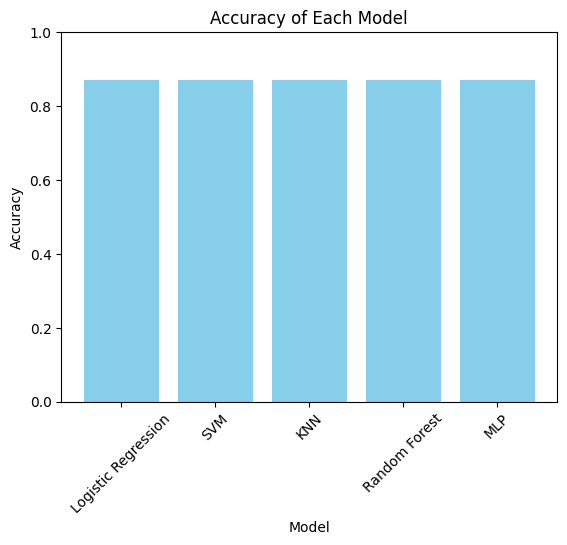

In [129]:
# Model names
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'MLP']

# Accuracy scores
accuracy_scores = [logistic_regression_accuracy, svm_accuracy, knn_accuracy, rf_accuracy, mlp_accuracy]

# Create bar plot
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()

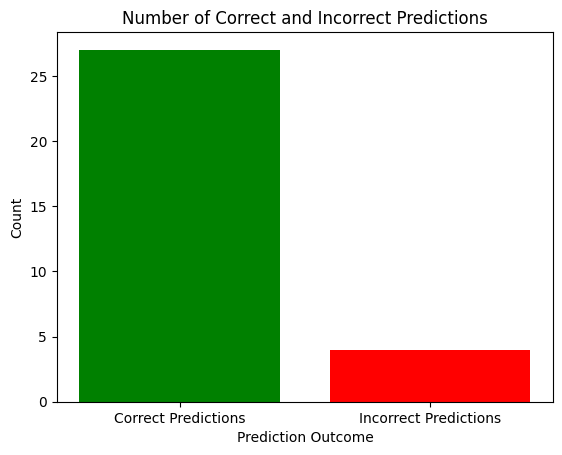

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('Logistic_Regression_predictions.csv')

# Count correct predictions
correct = (data['Prediction'] == data['Actual']).sum()

# Count incorrect predictions
incorrect = len(data) - correct

# Create bar plot
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct, incorrect], color=['green', 'red'])
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.title('Number of Correct and Incorrect Predictions')
plt.show()

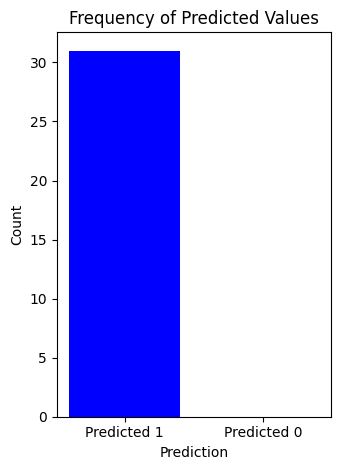

In [127]:
# Count the number of times it predicted 1
predicted_1 = (data['Prediction'] == 1).sum()

# Create bar plot for predicted 1
plt.subplot(1, 2, 2)
plt.bar(['Predicted 1', 'Predicted 0'], [predicted_1, len(data) - predicted_1], color=['blue', 'orange'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Frequency of Predicted Values')

plt.tight_layout()
plt.show()

## Discussion

If all the models are predicting True for everything in the context of determining if smoking causes lung cancer, it suggests potential issues with the models or the data. This could include data imbalance, biased data, inadequate feature selection, or overfitting.
Comparing the number of positives with the number of negatives in the training data, it is clear that the dataset is imbalanced which could have led to overfitting of the model.
Overfitting means the models has learned noise rather than true patterns in the data. This can lead to unreliable predictions, false positives, and inaccurate assessments of the relationship between smoking and lung cancer.

 Addressing these issues may involve strategies such as collecting more balanced data, refining feature selection, and experimenting with different model architectures and training techniques. Overall, it suggests a high rate of false positives, potentially leading to unnecessary stress, medical interventions, and misallocation of resources for individuals incorrectly diagnosed with lung cancer.